# **HR Attrition Analysis – Salifort Motors**

## Project Overview

This project analyzes employee attrition at Salifort Motors, a large consulting firm, to uncover patterns and build predictive models that help Human Resources anticipate and reduce turnover. It combines business context with practical data science tools to deliver clear, actionable insights.

**Objectives:**
- Identify the key factors driving employee attrition
- Visualize patterns across departments, tenure, and workload
- Build and evaluate models to predict attrition likelihood

**Methods and Tools:**

Data Analysis
- Data cleaning and transformation using pandas
- Exploratory analysis and visualizations using matplotlib and seaborn
  
Predictive Modeling
- Logistic Regression (linear model)
- Decision Tree (tree-based model)
- Random Forest (ensemble model for improved accuracy)

Each model was trained, evaluated, and interpreted using classification metrics (accuracy, precision, recall, F1-score), and, where relevant, feature importance and visualization of decision paths.

**Key Outputs:**
- Cleaned dataset suitable for modeling
- Visualizations of attrition by:
1. Tenure
2. Weekly working hours
3. Department
- Side-by-side model comparisons with evaluation metrics
- Interpretation of top predictors influencing attrition

**Ethical Considerations:**
The analysis accounts for the ethical use of employee data and the importance of fairness in model prediction. Care was taken to avoid reinforcing bias in department or demographic features.

### Business Scenario and Problem Statement

This project explores employee attrition at **Salifort Motors**, a large consulting firm. The goal is to uncover the factors that contribute most to turnover and build predictive models to help HR teams proactively identify employees at risk of leaving.

High turnover presents a significant business challenge — it increases hiring costs, disrupts team dynamics, and reduces institutional knowledge. Using historical HR data, this analysis investigates patterns in tenure, department, working hours, and other variables to better understand what drives attrition.

The project combines exploratory data analysis with multiple predictive modeling techniques to support data-driven HR decision-making and improve employee retention.

### Project Context & Planning

**Stakeholders**
The primary stakeholders in this project are:

- Salifort Motors' senior leadership, who are concerned with the financial and operational impacts of high employee turnover.
- The Human Resources (HR) department, which is responsible for employee satisfaction, retention, and professional development.
- Employees themselves are also indirect stakeholders, as insights from this analysis may shape future workplace policies and engagement strategies.

**Project Goals**
This analysis aims to:
- Predict whether an employee is likely to leave the company based on behavioral and performance data.
- Identify the key drivers of employee attrition (e.g., satisfaction level, tenure, project load)
- Provide actionable insights to support data-informed HR strategies that improve retention and reduce turnover-related costs
  
**Tools and Resources**
Throughout the project, the following tools and resources were used:
- pandas for data manipulation
- matplotlib & seaborn for visualizations
- scikit-learn for building and evaluating predictive models

**Ethical Considerations**
- Privacy and confidentiality: In real-world settings, employee-level data must be handled with care and privacy regulations in mind.
- Bias and fairness: Care was taken to avoid building models that could unfairly impact specific groups based on tenure, department, or salary.
- Transparency and interpretability: Model selection prioritized interpretability to ensure that HR and leadership could understand and act on the results responsibly.
- Positive outcomes: Insights should be used to improve the employee experience—not to penalize individuals based on predictions.

## Step 1. Imports

This section imports all necessary Python libraries for data manipulation, visualization, and machine learning. It also loads the HR attrition dataset into a pandas DataFrame.



In [1]:
!pip install xgboost

In [2]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display all columns in outputs
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and evaluation
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

In [3]:
#dataset load
df = pd.read_csv("HR_capstone_dataset.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

This section explores the structure and content of the dataset. The goal is to understand the types of variables, detect any missing or inconsistent data, and prepare the dataset for analysis and modeling.



### Dataset Overview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Summary Statistics


In [5]:
df.describe(include= 'all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Column Renaming

To ensure consistency and clarity throughout the analysis, column names are standardized using snake_case formatting. This step also corrects any typos and simplifies verbose or inconsistent labels for readability and ease of use in code.

In [6]:
# Display all column names
print(df.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')


In [7]:
# Renaming of columns
df = df.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

# Updated Column Names
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Missing values

We check for missing entries that may require imputation or exclusion.

In [8]:
# Missing Values
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Duplicate Records

We ensure there are no redundant entries that could bias the model.

In [9]:
#Duplicates Check
print(df.duplicated())
print('')
print('nom of duplicates:', df.duplicated().sum())

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

nom of duplicates: 3008


In [10]:
# Duplicates Inspection
duplicates = df[df.duplicated()]
duplicates.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


In [12]:
# Remove duplicate rows from the dataset
df_clean = df.drop_duplicates(keep='first')

# Preview the cleaned dataset
df_clean.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Outliers Detection

Outliers in features such as `tenure` can distort visualizations and influence model performance. In this step, we use a boxplot and the interquartile range (IQR) method to identify unusually high or low tenure values. This will inform how we handle outliers in later modeling stages.

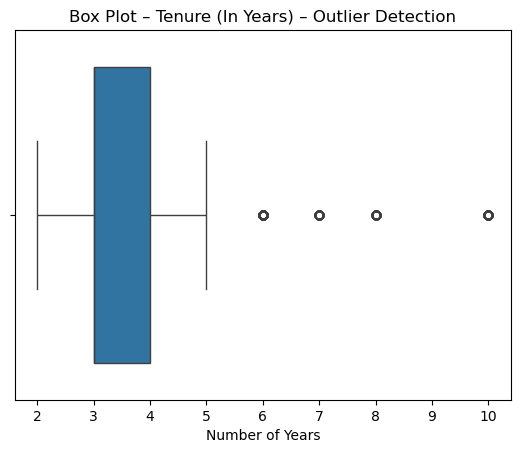

In [13]:
# boxplot to visualize the distribution of 'tenure' and identify potential outliers
sns.boxplot(x=df_clean['tenure'])
plt.xlabel('Number of Years')
plt.title('Box Plot – Tenure (In Years) – Outlier Detection')
plt.show()



In [15]:
# Calculate the 25th and 75th percentiles
q1 = df_clean['tenure'].quantile(0.25)
q3 = df_clean['tenure'].quantile(0.75)

# Compute the interquartile range (IQR)
iqr = q3 - q1

# Define upper and lower bounds for non-outlier values
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

# Identify outliers
outliers = df_clean[(df_clean['tenure'] < lower_limit) | (df_clean['tenure'] > upper_limit)]

# Report results
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)
print("Number of rows containing outliers in 'tenure':", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows containing outliers in 'tenure': 824


The IQR method identified 824 rows with tenure values outside the normal range (1.5 to 5.5 years). Whether to retain or remove these depends on modeling context. Tree-based models (like Random Forest) are generally robust to outliers, while linear models (like Logistic Regression) may be more sensitive.


## Step 3. Exploratory Data Analysis (EDA) and Visualizations

This section provides a series of visual analyses to better understand trends, patterns, and potential predictors of employee attrition. We use bar plots, box plots, histograms, and scatterplots to explore relationships between attrition and key variables such as satisfaction, tenure, salary, and promotions.


### Attrition Overview

Before diving deeper into variable relationships, it's useful to understand the overall attrition rate in the dataset. The plot below visualizes the distribution of employees who left vs. those who stayed, and the corresponding percentages are also printed.


In [16]:
# Count of employees who left vs. stayed
print("Number of people who left:")
print(df_clean['left'].value_counts())

# Percentage of people who left vs. stayed
print("\nPercentage of people who left:")
print(df_clean['left'].value_counts(normalize=True) * 100)

Number of people who left:
left
0    10000
1     1991
Name: count, dtype: int64

Percentage of people who left:
left
0    83.39588
1    16.60412
Name: proportion, dtype: float64


### Data visualizations

### Distribution of Employees Who Left vs. Stayed

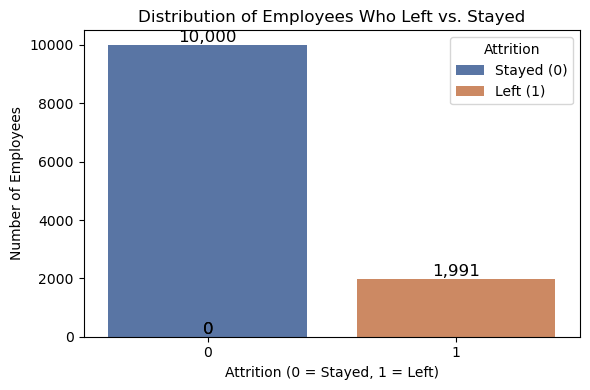

In [27]:
plt.figure(figsize=(6, 4))

# Add 'hue="left"' and use same palette
ax = sns.countplot(
    data=df_clean,
    x='left',
    hue='left',
    palette={0: '#4C72B0', 1: '#DD8452'}
)

# Annotate bar heights
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():,.0f}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='center',
        fontsize=12, color='black', 
        xytext=(0, 5), 
        textcoords='offset points'
    )

plt.title('Distribution of Employees Who Left vs. Stayed')
plt.xlabel('Attrition (0 = Stayed, 1 = Left)')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition', labels=['Stayed (0)', 'Left (1)'])
plt.tight_layout()
plt.show()


### Attrition by Department

Understanding attrition patterns across departments helps identify areas with higher turnover. The plot below shows the distribution of employees who left versus those who stayed, broken down by department.


In [19]:
# Department-wise counts (optional, exploratory)
df_clean['department'].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

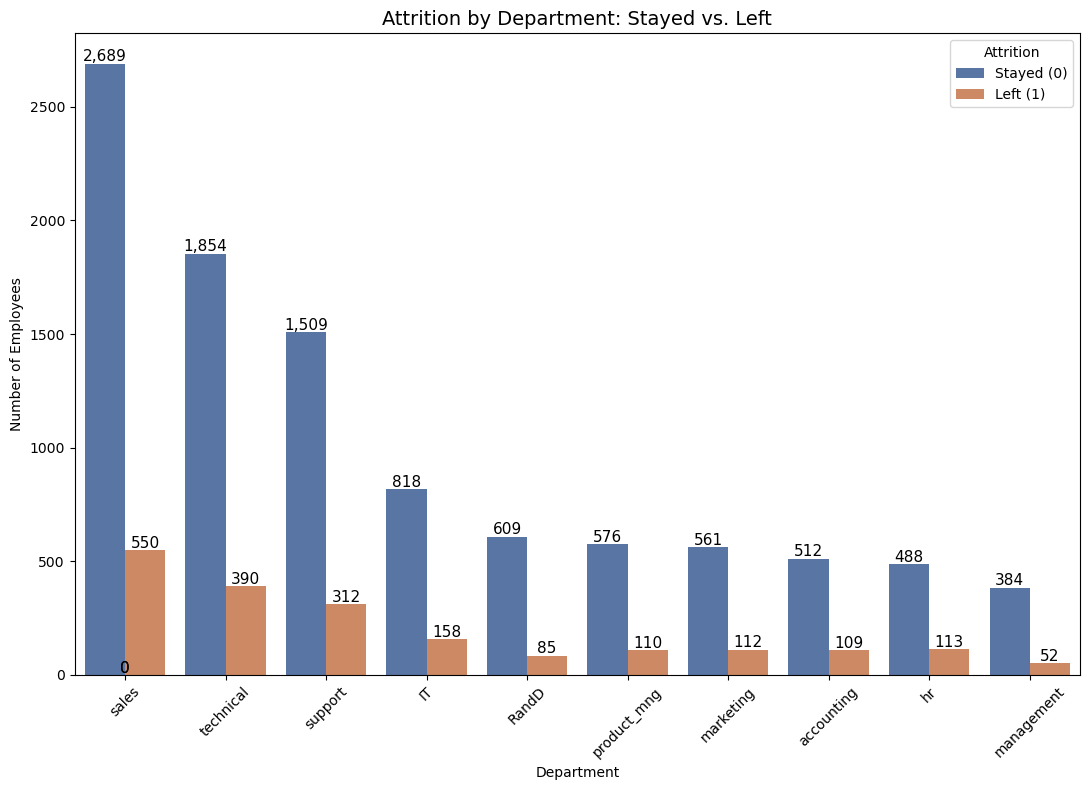

In [23]:
# Attrition by department using countplot 
plt.figure(figsize=(11, 8))

ax = sns.countplot(
    data=df_clean,
    x='department',
    hue='left',
    order=df_clean['department'].value_counts().index,
    palette={0: '#4C72B0', 1: '#DD8452'}
)

# Annotate bar heights
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():,.0f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        fontsize=11, color='black',
        xytext=(0, 5), textcoords='offset points'
    )

plt.xticks(rotation=45)
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.title('Attrition by Department: Stayed vs. Left', fontsize=14)
plt.legend(title='Attrition', labels=['Stayed (0)', 'Left (1)'])
plt.tight_layout()
plt.show()


Attrition appears to be most concentrated in the sales, technical, and support departments. These insights can guide HR interventions by identifying departments with unusually high turnover.


### Attrition by Salary Level

Lower salary levels often correlate with higher attrition. This plot illustrates how attrition varies across salary categories.

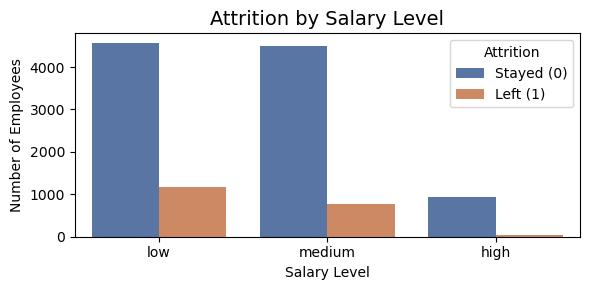

In [28]:
plt.figure(figsize=(6, 3))

sns.countplot(
    data=df_clean,
    x='salary',
    hue='left',
    order=['low', 'medium', 'high'],
    palette={0: '#4C72B0', 1: '#DD8452'}
)

plt.title('Attrition by Salary Level', fontsize=14)
plt.xlabel('Salary Level')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition', labels=['Stayed (0)', 'Left (1)'])
plt.tight_layout()
plt.show()

### Attrition by Promotion Status

This stacked bar chart shows attrition in relation to whether an employee was promoted in the last 5 years.


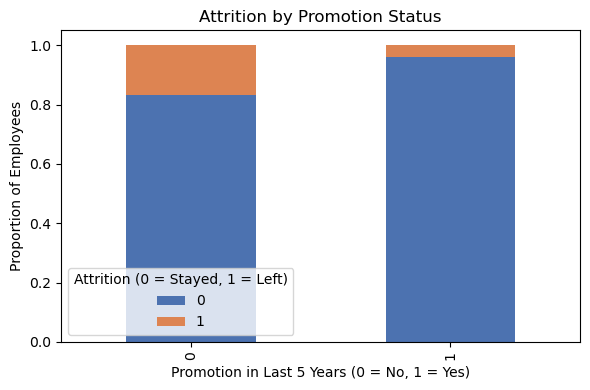

In [29]:
colors = ['#4C72B0', '#DD8452']  # Order: 0 (Stayed), 1 (Left)

# Plot stacked bar chart
pd.crosstab(
    df_clean['promotion_last_5years'], 
    df_clean['left'], 
    normalize='index'
).plot(
    kind='bar', 
    stacked=True, 
    figsize=(6, 4), 
    color=colors
)

plt.title('Attrition by Promotion Status')
plt.xlabel('Promotion in Last 5 Years (0 = No, 1 = Yes)')
plt.ylabel('Proportion of Employees')
plt.legend(title='Attrition (0 = Stayed, 1 = Left)')
plt.tight_layout()
plt.show()


### Job Satisfaction vs. Attrition

This boxplot compares satisfaction levels for employees who stayed versus those who left. Lower satisfaction appears to be associated with higher attrition.


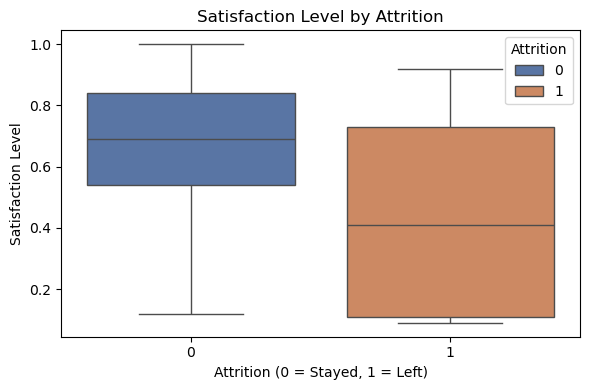

In [30]:
plt.figure(figsize=(6, 4))

sns.boxplot(
    x='left',
    y='satisfaction_level',
    data=df_clean,
    hue='left',
    palette={0: '#4C72B0', 1: '#DD8452'}
)

plt.title('Satisfaction Level by Attrition')
plt.xlabel('Attrition (0 = Stayed, 1 = Left)')
plt.ylabel('Satisfaction Level')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

### Mean and Median Satisfaction Scores by Attrition Status

To understand whether satisfaction differs between employees who stayed and those who left, we calculate both the mean and median satisfaction levels for each group.


In [31]:
# Calculate mean and median satisfaction scores grouped by attrition
df_clean.groupby('left', observed=True)['satisfaction_level'].agg(['mean', 'median']).round(3)


,mean,median
left,,
0,0.667,0.69
1,0.440,0.41


### Correlation Heatmap of Numeric Features
To explore the relationships between numerical variables, we generate a correlation heatmap. This visualization highlights the strength and direction of linear associations between features such as satisfaction level, evaluation score, number of projects, tenure, and more. Strong positive or negative correlations may help identify key drivers of attrition and guide further analysis.

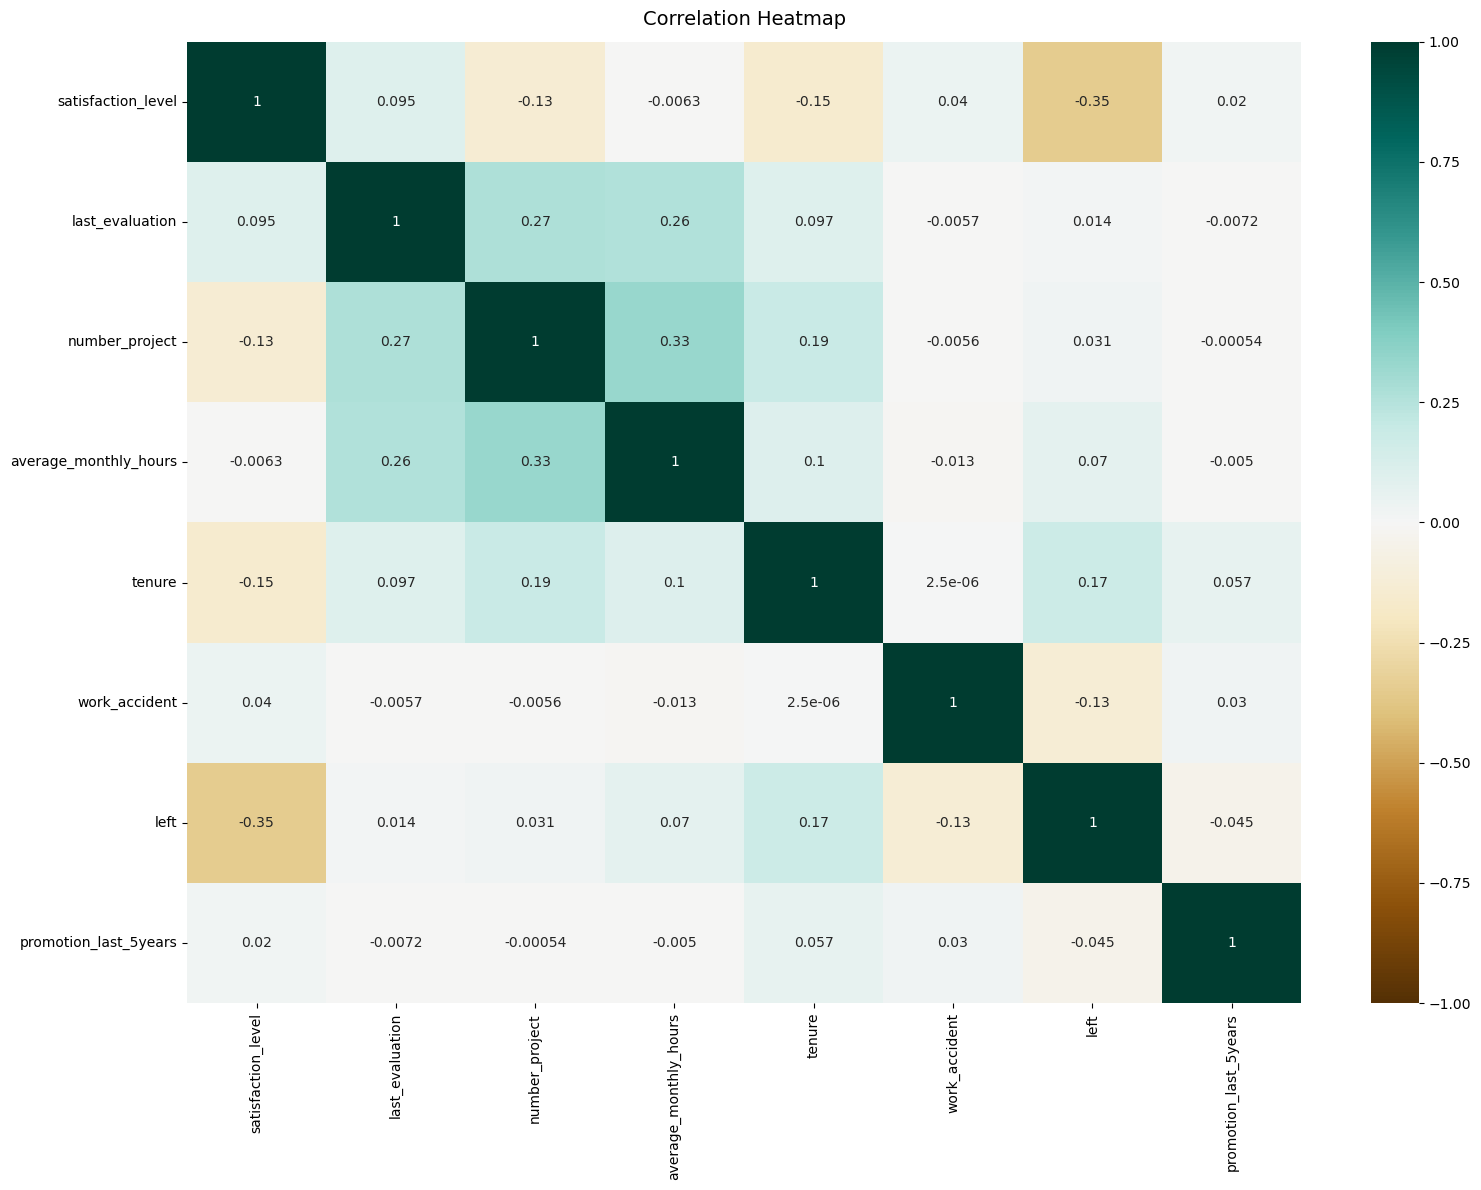

In [32]:
# Correlation heatmap with only numeric columns
plt.figure(figsize=(16, 12))
numeric_df = df_clean.select_dtypes(include='number')  # keep only numeric columns
heatmap = sns.heatmap(numeric_df.corr(), vmin=-1, vmax=1, annot=True,
                      cmap=sns.color_palette('BrBG', as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 14}, pad=12)
plt.tight_layout()
plt.show()

The correlation heatmap reveals several key relationships in the dataset:
- Number of projects, average monthly hours, and last evaluation scores are positively correlated, suggesting that more engaged employees tend to work longer hours and receive higher evaluations.
- Attrition (left) is negatively correlated with satisfaction level, meaning employees with lower job satisfaction are more likely to leave.
- Other variables show weak or negligible correlation with attrition, indicating that multiple factors should be considered in predictive modeling.

### Tenure and Satisfaction Analysis by Attrition Status
This set of plots examines how employee tenure relates to satisfaction and attrition.

The boxplot on the left shows the distribution of satisfaction scores across different tenure levels, separated by attrition status. It helps identify whether satisfaction varies systematically with length of service and departure.

The histogram on the right compares the tenure distribution of employees who stayed versus those who left, highlighting any tenure ranges associated with higher turnover risk.

These visualizations can reveal tenure-related patterns that may inform retention strategies.



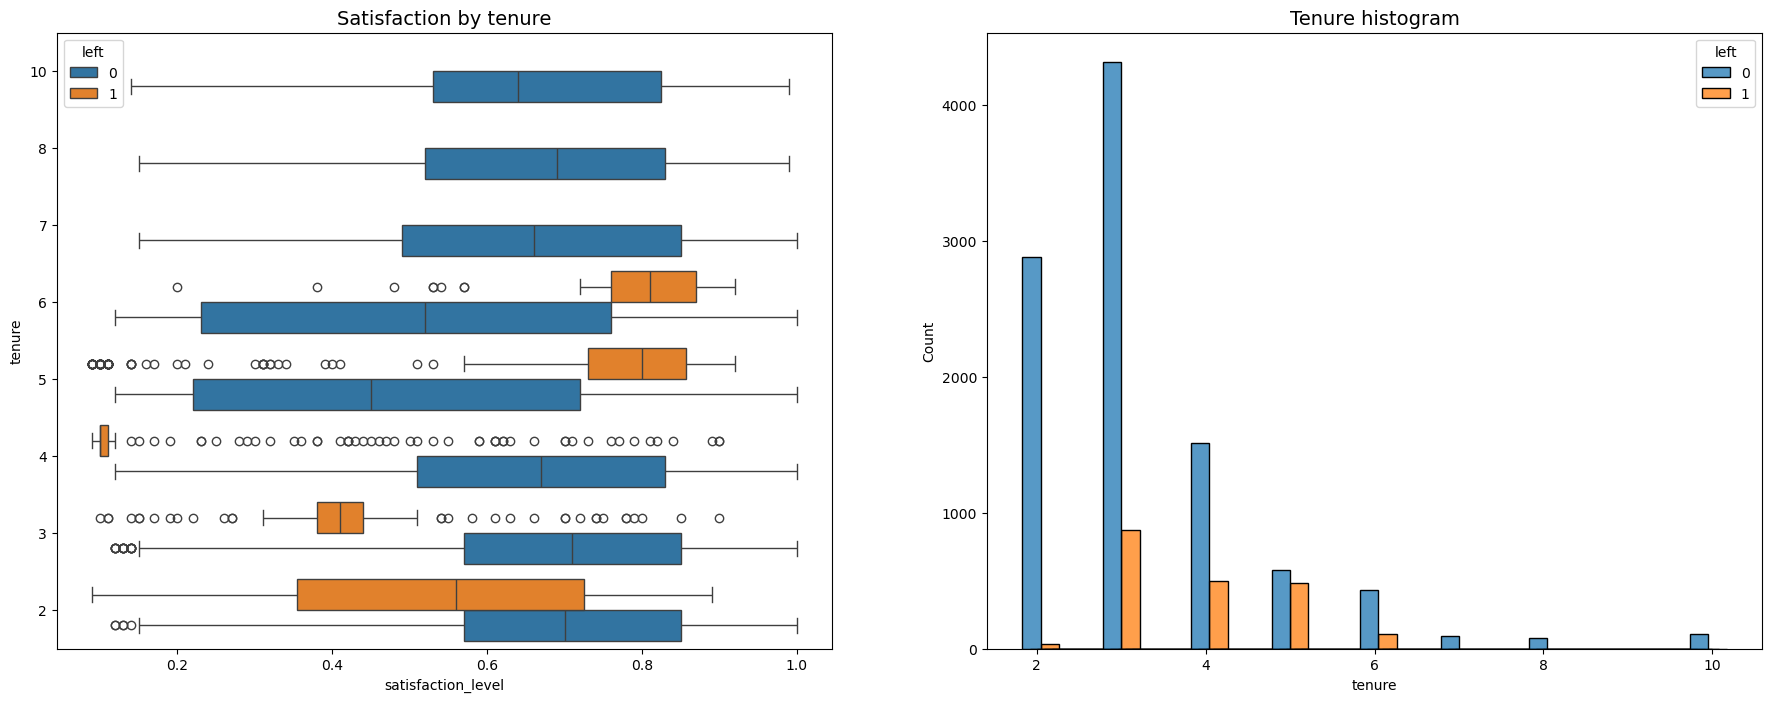

In [33]:
# Figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df_clean, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df_clean[df_clean['left']==0]['tenure']
tenure_left = df_clean[df_clean['left']==1]['tenure']
sns.histplot(data=df_clean, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

The plot reveals several key insights:
- Employees who left generally fall into two groups: those with low satisfaction and short tenures, and those with high satisfaction and mid-length tenures.
- Employees with four years of tenure who left show unusually low satisfaction. This could indicate a policy change or company milestone around the four-year mark that warrants further investigation.
- Longest-tenured employees did not leave, and their satisfaction levels were similar to those of newer employees who stayed.
- The histogram indicates that longer-tenured employees are relatively few, possibly because they hold higher-level or better-compensated roles.
- Assuming a standard 40-hour work week and two weeks of vacation per year, ***the average number of working hours per month for a typical Monday–Friday employee comes out to approximately 166.67 hours*** (i.e., 50 weeks × 40 hours ÷ 12 months). When I compare this benchmark to the data, I notice that almost every group—except those working on just two projects—put in significantly more hours than this, including employees who chose to stay. This strongly suggests that employees at this company are consistently overworked, regardless of whether they eventually left or remained.

In [40]:
#Value counts of stayed/left for employees with 7 projects
df_clean[df_clean['number_project']==7]['left'].value_counts()

left
1    145
Name: count, dtype: int64

This confirms that all employees with 7 projects did leave. 



#### Salary Distribution by Tenure Group
This dual-panel histogram explores how salary levels differ between short-tenured and long-tenured employees.

The left plot displays salary distribution for employees with fewer than 7 years at the company.

The right plot focuses on employees with more than 6 years of tenure.

These visualizations help determine whether higher tenure is associated with higher salary bands or whether compensation remains relatively flat over time.

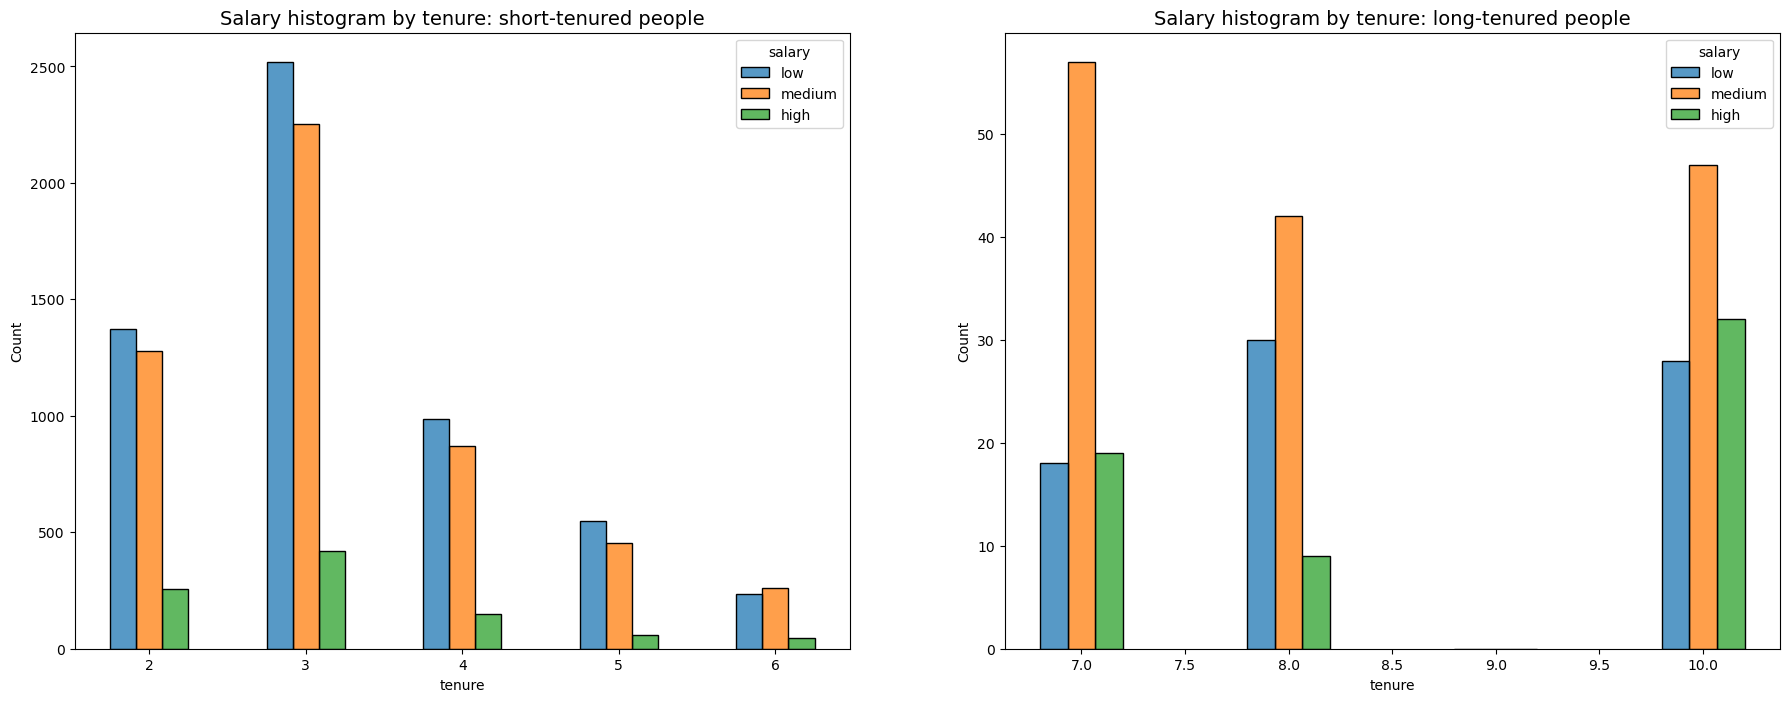

In [36]:
#How does salary distribution vary between newer and more experienced employees?
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df_clean[df_clean['tenure'] < 7]

# Define long-tenured employees
tenure_long = df_clean[df_clean['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

- The plots above indicate that long-tenured employees were not predominantly earning higher salaries.
- Despite spending more years with the company, many of these individuals remained in lower or medium salary tiers, suggesting that tenure alone did not guarantee higher pay.
- As a next step, it would be valuable to examine whether employees who worked longer hours also received higher performance evaluations.


### Relationship Between Monthly Hours and Satisfaction by Attrition Status
This scatterplot visualizes the relationship between an employee's average monthly working hours and their satisfaction level, differentiated by attrition status.

A vertical line is drawn at the mean workload of 166.67 hours/month to help interpret trends relative to the company-wide average.

Color-coded points distinguish between employees who stayed and those who left, highlighting potential clusters of overworked or dissatisfied individuals.

This visualization can reveal whether long working hours are associated with low satisfaction or higher attrition risk.

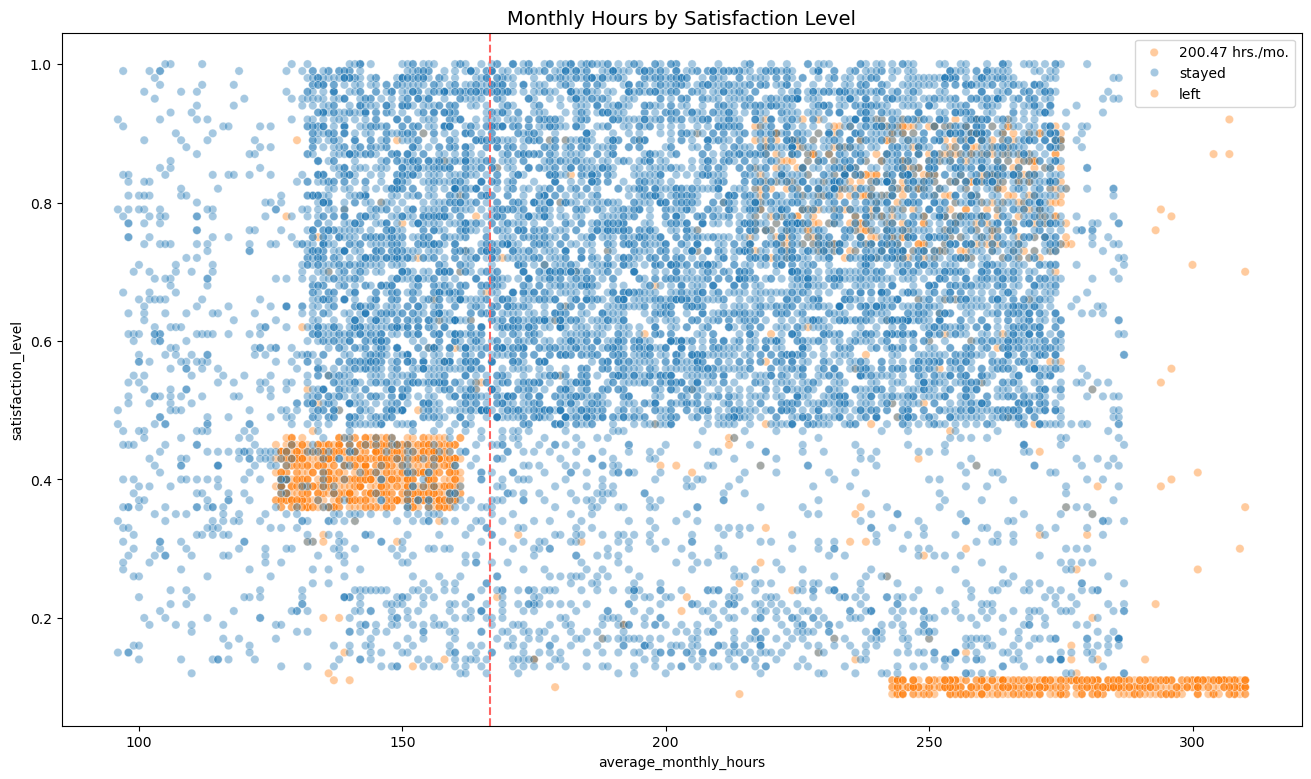

In [42]:
# Scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df_clean, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['200.47 hrs./mo.', 'stayed', 'left'])
plt.title('Monthly Hours by Satisfaction Level', fontsize='14');

From the scatterplot above, I can see that there’s a sizeable group of employees who worked around 240 to 315 hours per month. That upper bound—315 hours per month—translates to more than 75 hours per week over an entire year, which is staggering. It’s not surprising that many of those employees had satisfaction levels close to zero.

I also noticed another group who left the company despite having more typical working hours. Their satisfaction levels hovered around 0.4, which still seems low. I can’t say for sure why they left, but I suspect they may have felt indirect pressure to overwork, especially if many of their colleagues were logging significantly more hours. That kind of environment could easily chip away at satisfaction.

There’s also a group that worked between 210 and 280 hours per month, with satisfaction levels ranging from about 0.7 to 0.9. That’s notably higher, and it seems these employees may have been more content, at least on the surface.

Lastly, I can’t ignore the odd shape of these distributions. The clearly segmented and clustered patterns raise a red flag—they strongly suggest this dataset may be synthetic or manipulated rather than organic real-world data.

### Monthly Hours vs. Promotion Status by Attrition
This scatterplot explores the relationship between average monthly hours worked and whether an employee was promoted in the last five years.

A dashed vertical line at 166.67 hours/month represents the average workload across all employees.

Color-coded points indicate whether employees stayed or left, enabling a comparison of attrition patterns relative to workload and promotion history.

This plot helps assess whether promotions are linked to workload levels and whether promotion impacts retention.

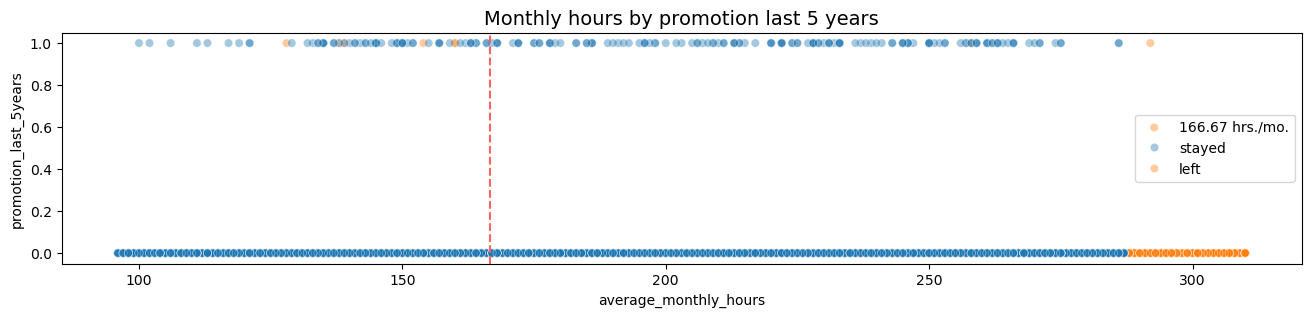

In [43]:
#A scatterplot to examine the relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df_clean, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'stayed', 'left'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

The plot above reveals the following key insights:
- Employees who were promoted in the last five years rarely left the company, suggesting a strong link between promotion and retention.
- Promotions were uncommon among employees with the highest workloads, indicating that long hours did not necessarily lead to advancement.
- All employees who left the company were among those working the longest hours, reinforcing the idea that excessive workload without recognition may contribute to attrition.

## Step 4. Predictive Modeling

We build and evaluate classification models to predict employee attrition using relevant features from the dataset. The modeling process includes:

- Feature selection and train-test splitting
- Fitting Logistic Regression, Decision Tree, and Random Forest classifiers
- Assessing model performance using accuracy, precision, recall, F1-score, and ROC-AUC
- Comparing results to identify the most effective model

### Defining the Prediction Task

The goal is to predict whether an employee will leave or stay at the company. This is a supervised machine learning problem involving a binary classification task. The target variable 'left' has two classes:

1 = employee left the company

0 = employee stayed

This structure enables classification models to learn from historical data and predict employee attrition outcomes.

### Model Selection Strategy

Given that the target variable is binary and categorical, the task is best approached using classification algorithms. Models considered include:
- Logistic Regression – a strong, interpretable baseline for binary classification
- Tree-based models – such as Decision Trees, Random Forests, and Gradient Boosting, which capture non-linear patterns and variable interactions
- Model performance will be assessed using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.

### 4A) Modeling: Logistic Regression Model


In [44]:
### YOUR CODE HERE ###
# Dataframe copy
df_enc = df_clean.copy()

# Encoding of the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encoding the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# New dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


### Correlation Heatmap to study correlated variables


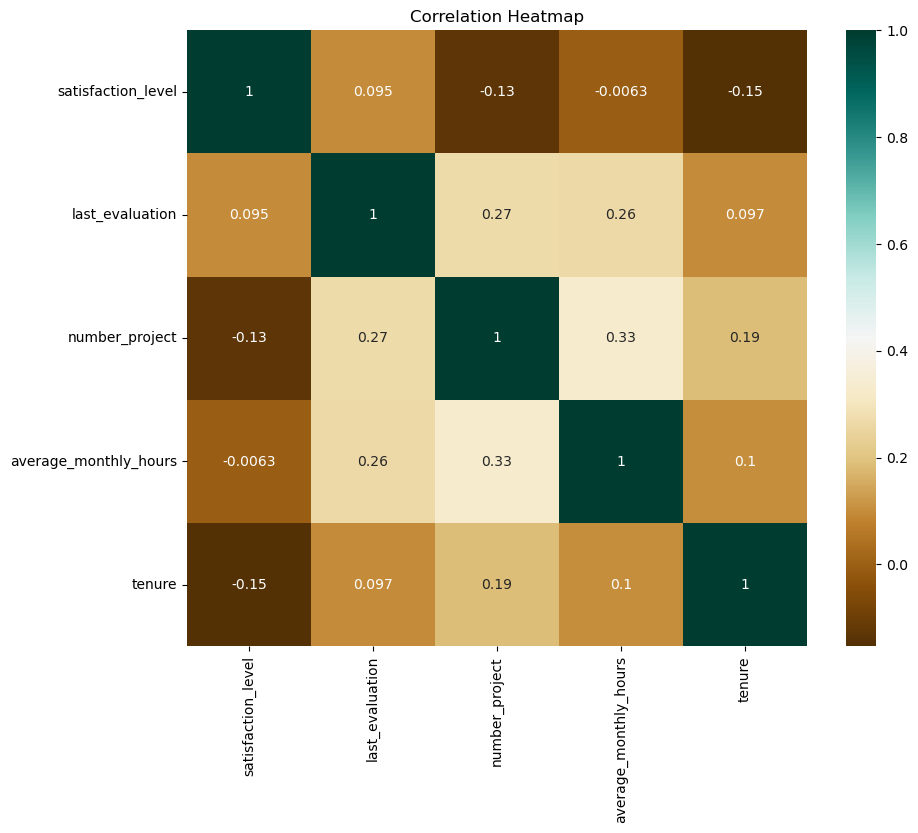

In [45]:
# heatmap to visualize how correlated variables are
plt.figure(figsize=(10,8))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap='BrBG')
plt.title('Correlation Heatmap')
plt.show()

### Department-wise Attrition Analysis

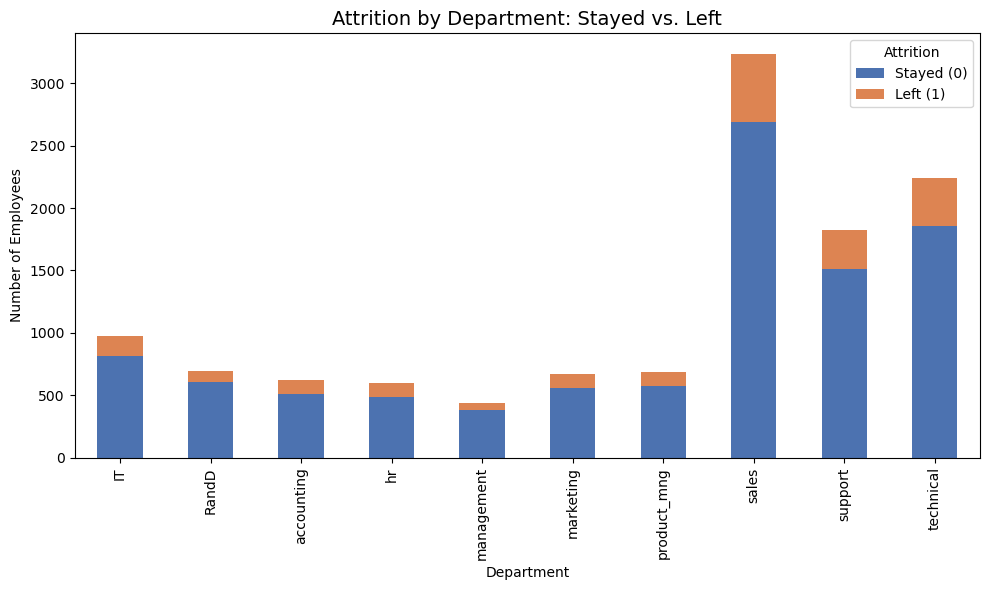

In [46]:
# Stacked bar chart of attrition across departments
pd.crosstab(df_clean['department'], df_clean['left'])\
  .plot(kind='bar', stacked=True, color=['#4C72B0', '#DD8452'], figsize=(10, 6))

plt.title('Attrition by Department: Stayed vs. Left', fontsize=14)
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition', labels=['Stayed (0)', 'Left (1)'])
plt.tight_layout()
plt.show()


### Preparing Data for Logistic Regression

In [47]:
#To improve model accuracy and reduce the impact of extreme values, we remove outliers from the `tenure` variable based on predefined 
#upper and lower limits.

df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


In [48]:
# outcome variable isolation
y = df_logreg['left']

y.head() 

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int32

In [49]:
# We define the feature matrix by dropping the target variable 'left'
X = df_logreg.drop('left', axis=1)

X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,0,0,False,False,False,False,False,False,False,True,False,False


In [50]:
# Data splitting into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [51]:
log_clf = LogisticRegression(random_state=42, max_iter=2000).fit(X_train, y_train)

In [52]:
# Using the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

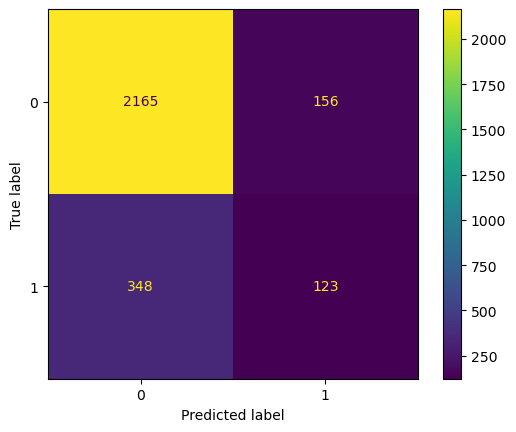

In [53]:
# Computing values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Creating display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plotting confusion matrix
log_disp.plot(values_format='')

# Plot Display
plt.show()

The confusion matrix is divided into four sections:
- Top-left (True Negatives): These are employees who stayed and were correctly predicted by the model as staying.
- Top-right (False Positives): These are employees who stayed but were incorrectly predicted by the model as having left.
- Bottom-left (False Negatives): These are employees who left but were wrongly predicted to have stayed.
- Bottom-right (True Positives): These are employees who left and were accurately predicted by the model as leaving.

I’ll check the value counts in the left column to understand the class balance. Since this is a binary classification task, knowing whether the classes are balanced will help me interpret accuracy metrics more effectively.

In [54]:

df_logreg['left'].value_counts(normalize=True)*100

left
0    83.146772
1    16.853228
Name: proportion, dtype: float64

In [55]:
# Creating a classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



The classification report above shows that the logistic regression model achieved a weighted average precision of 79%, recall of 82%, F1-score of 80%, and an overall accuracy of 82%. However, if my priority is to accurately identify employees who leave, the model’s performance is noticeably lower for that specific class.

### 4B) Modeling Approach B: Tree-based Model
As the logistic Regression performed poorly in identifying who would leave which is what is important for the HR I'll build a  Decision Tree and Random Forest to see if they perform better

In [126]:
# Outcome variable isolation
y = df_enc['left']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int32

In [127]:
# feature selection
X = df_enc.drop('left', axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,0,False,False,False,False,False,False,False,True,False,False


In [128]:
# Data splitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

#### 4.B.1) Decision tree - Round 1

In [129]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Hyperparameters to search over
cv_params = {
    'max_depth': [4, 6, 8, None],
    'min_samples_leaf': [2, 5, 1],
    'min_samples_split': [2, 4, 6]
}

# Create Scoring set
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}


# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [130]:
%%time
tree1.fit(X_train, y_train)

CPU times: total: 5.03 s
Wall time: 5.08 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [131]:
# Best parameters Check
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [132]:
# Best AUC score on CV
tree1.best_score_

0.969819392792457

In [133]:
def make_results(model_name: str, model_object, metric: str) -> pd.DataFrame:
    """
    I created this function to summarize the performance of different models
    after tuning with GridSearchCV. It returns a one-row DataFrame with the
    key metrics for the model that performed best based on the chosen scoring metric.

    Parameters:
        model_name (str): What I want to call the model in the output table.
        model_object (GridSearchCV): A GridSearchCV object that I’ve already fit.
        metric (str): The evaluation metric I want to optimize for. It can be
                      'precision', 'recall', 'f1', 'accuracy', or 'auc'.

    Returns:
        pd.DataFrame: A single-row table that includes the best model's
                      precision, recall, F1-score, accuracy, and AUC.
    """

    # I created this dictionary to translate the human-readable metric
    # into the internal keys used by GridSearchCV
    metric_map = {
        'auc': 'mean_test_roc_auc',
        'precision': 'mean_test_precision',
        'recall': 'mean_test_recall',
        'f1': 'mean_test_f1',
        'accuracy': 'mean_test_accuracy'
    }

    # I converted the cross-validation results into a DataFrame so I could easily explore them
    results_df = pd.DataFrame(model_object.cv_results_)

    # I then found the row with the highest score based on my selected metric
    best_index = results_df[metric_map[metric]].idxmax()
    best_row = results_df.loc[best_index]

    # Finally, I extracted all the evaluation metrics I care about from that row
    summary = {
        'model': model_name,
        'precision': best_row['mean_test_precision'],
        'recall': best_row['mean_test_recall'],
        'F1': best_row['mean_test_f1'],
        'accuracy': best_row['mean_test_accuracy'],
        'auc': best_row['mean_test_roc_auc']
    }

    return pd.DataFrame([summary])


In [134]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819


#### 4.B.2) Random forest 

In [135]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Create Scoring dictionary
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [159]:
%%time
#rf1.fit(X_train, y_train) # --> Wall time: ~24min

CPU times: total: 26min 48s
Wall time: 27min 16s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [160]:
# Defining path of pickle
path = r'E:\OMAR ZAHRAN\5. Shift Career\Shifting Process\HR_Attriation_Analysis\\'


In [161]:
def write_pickle(path, model_object, save_as: str):
    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)


In [162]:
def read_pickle(path, saved_model_name: str):
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)
    return model


In [163]:
# Save the model
write_pickle(path, rf1, 'rf1_gridsearch')



In [164]:
# Load the model later without retraining
rf1_loaded = read_pickle(path, 'rf1_gridsearch')


In [165]:
#pickle test
print(type(rf1_loaded))


<class 'sklearn.model_selection._search.GridSearchCV'>


In [166]:
#pickle test
print(rf1_loaded.best_estimator_)


RandomForestClassifier(max_depth=5, max_features=1.0, max_samples=0.7,
                       min_samples_split=4, n_estimators=500, random_state=0)


In [167]:
print(hasattr(rf1_loaded, 'best_estimator_'))  # Should print True
print(rf1_loaded.best_params_)  # Should print the best hyperparameters


True
{'max_depth': 5, 'max_features': 1.0, 'max_samples': 0.7, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 500}


In [157]:
#pickle test
import os
print(os.listdir(path))


['# 📊 HR Attrition Analysis – Salifort Mo.md', 'Activity_ Course 7 Salifort Motors project lab.ipynb', 'Files', 'Files.zip', 'HR_capstone_dataset.csv', 'rf1_gridsearch.pickle', 'Steps to follow.docx', '📊 HR Attrition Analysis.docx']


In [168]:
# Best AUC score on CV
rf1.best_score_

0.9804250949807172

In [169]:
# Best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [170]:
# All CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425


The random forest model generally outperforms the decision tree model in evaluation scores, with the exception of recall, where the difference is around 0.001— a negligible amount. This suggests that the random forest model is the superior performer overall.

In [171]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [172]:
# Get predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.964211,0.919679,0.941418,0.980987,0.956439


#### Feature Engineering

I noticed a potential issue with data leakage that could be affecting the model’s performance. To address this, I dropped the satisfaction_level feature, as it might not be available for all employees in a real-world scenario. Additionally, the average_monthly_hours feature could be a source of leakage, since employees who have already decided to quit or are identified for termination may be working fewer hours, skewing the data.

I then created a new binary feature called `overworked` to better capture whether an employee is working excessive hours. This feature will help the model reflect a more realistic scenario and improve its robustness.

In [173]:
#  Dropping `satisfaction_level` and saving the resulting dataframe in a new variable
df2 = df_enc.drop('satisfaction_level', axis=1)

# Display first few rows of new dataframe
df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


In [174]:
# `overworked` column created. For now, it's identical to average monthly hours.
df2['overworked'] = df2['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


In [175]:
# Define `overworked` as working > 175 hrs/week
df2['overworked'] = (df2['overworked'] > 175).astype(int)
df2['overworked'].head(15)

0     0
1     1
2     1
3     1
4     0
5     0
6     1
7     1
8     1
9     0
10    0
11    1
12    1
13    0
14    0
Name: overworked, dtype: int32

In [176]:
# Drop the `average_monthly_hours` column
df2 = df2.drop('average_monthly_hours', axis=1)
df2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0
1,0.86,5,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False,1
2,0.88,7,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False,1
3,0.87,5,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False,1
4,0.52,2,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0


In [177]:
# Isolate the outcome variable
y = df2['left']
X = df2.drop('left', axis=1)

#### 4.B.3) Decision tree - Round 2

In [178]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [179]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Create Scoring set
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [180]:
%%time
tree2.fit(X_train, y_train) # --> Wall time: ~3.8sec

CPU times: total: 3.92 s
Wall time: 3.96 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [181]:
# Best params
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [182]:
# Bbest AUC score on CV
tree2.best_score_

0.9586752505340426

In [183]:
# All CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675


Some of the other scores decreased, which is expected since fewer features were included in this round of the model. However, the scores are still strong.

#### 4.B.4)  Random forest - Round 2

In [184]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Create Scoring set
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}
# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [187]:
%%time
#rf2.fit(X_train, y_train) # --> Wall time: ~16min 47s

CPU times: total: 20min 29s
Wall time: 21min 3s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [188]:
write_pickle(path, rf2, 'rf2_gridsearch')


In [189]:
import os
print(os.listdir(path))


['# 📊 HR Attrition Analysis – Salifort Mo.md', 'Activity_ Course 7 Salifort Motors project lab.ipynb', 'Files', 'Files.zip', 'HR_capstone_dataset.csv', 'rf1_gridsearch.pickle', 'rf2_gridsearch.pickle', 'Steps to follow.docx', '📊 HR Attrition Analysis.docx']


In [190]:
rf2_loaded = read_pickle(path, 'rf2_gridsearch')


In [191]:
# best params
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [192]:
# best AUC score on CV
rf2.best_score_

0.9648100662833985

In [193]:
# all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675
               model  precision    recall        F1  accuracy      auc
0  random forest2 cv   0.866758  0.878754  0.872407  0.957411  0.96481


Again, while the scores dropped slightly, the random forest still outperforms the decision tree when using AUC as the primary evaluation metric.

In [194]:
# predictions on test data
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest2 test,0.870406,0.903614,0.8867,0.961641,0.938407


This seems to be a stable, well-performing final model

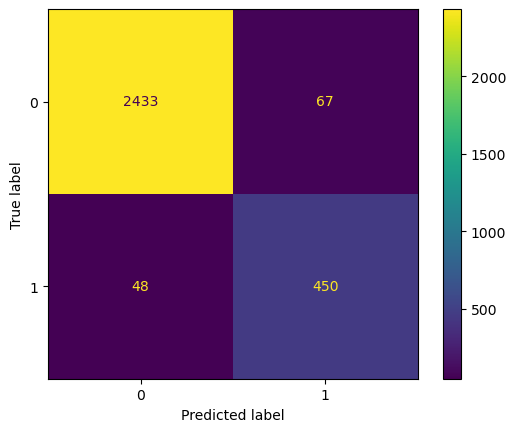

In [195]:
# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='');

The model generates more false positives than false negatives, meaning some employees may be flagged as at risk of leaving or being terminated when they’re not. Despite this, the model remains strong overall.

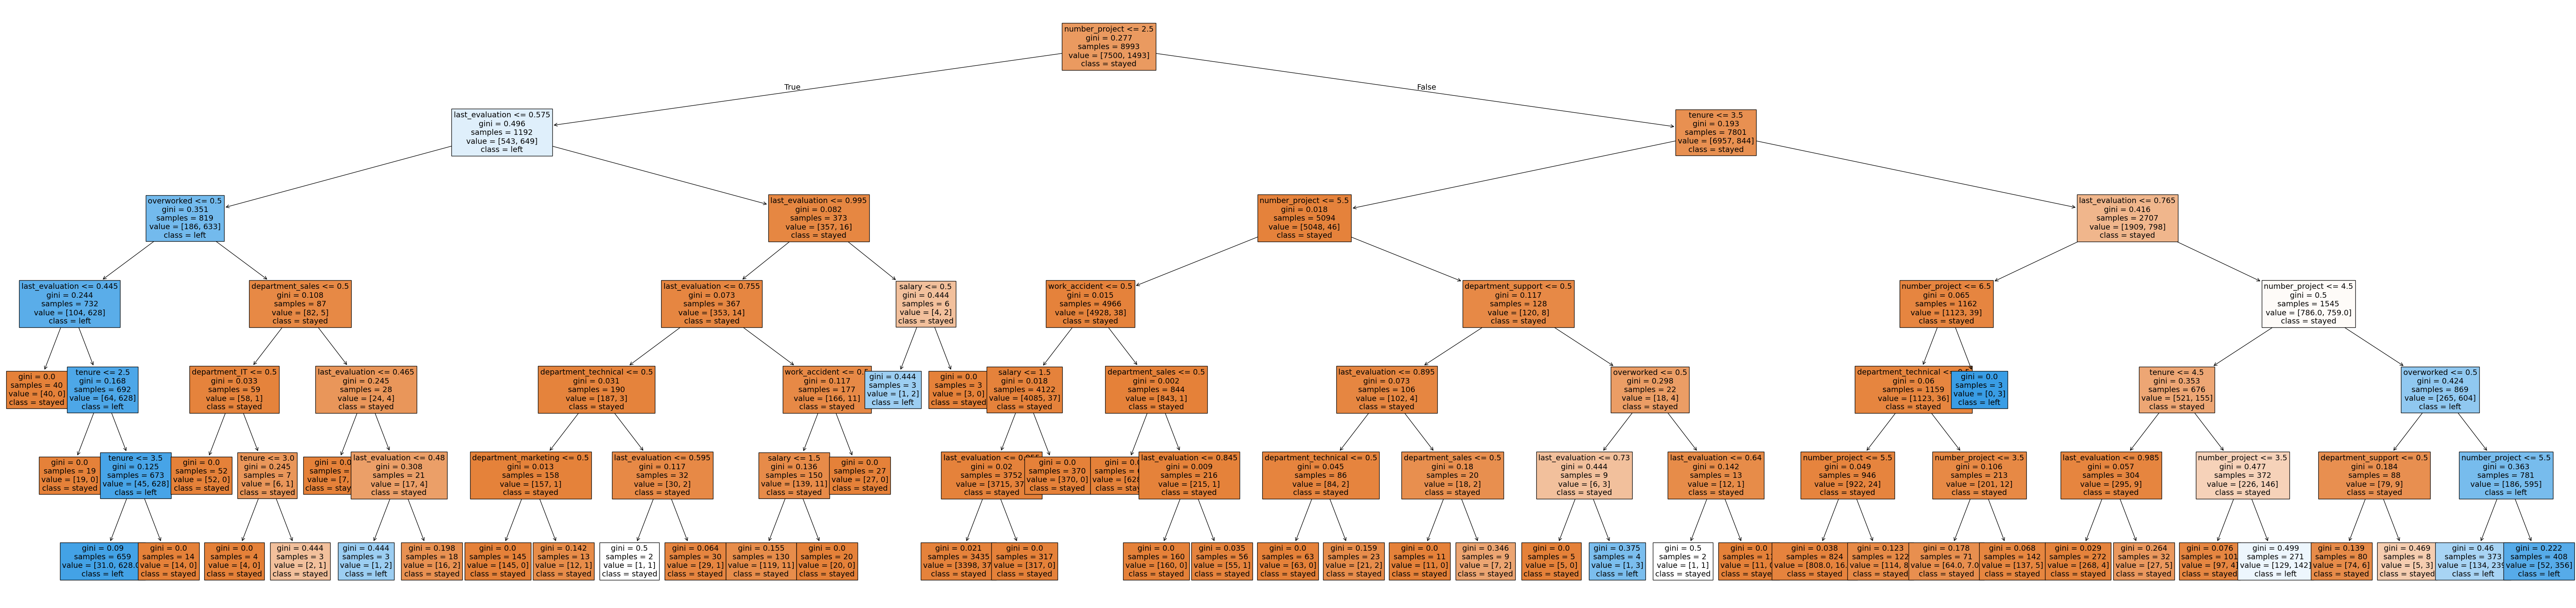

In [196]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

#### Decision tree feature importance

In [197]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
last_evaluation,0.343958
number_project,0.343385
tenure,0.215681
overworked,0.093498
department_support,0.001142
salary,0.000910
department_sales,0.000607
department_technical,0.000418
work_accident,0.000183
department_IT,0.000139


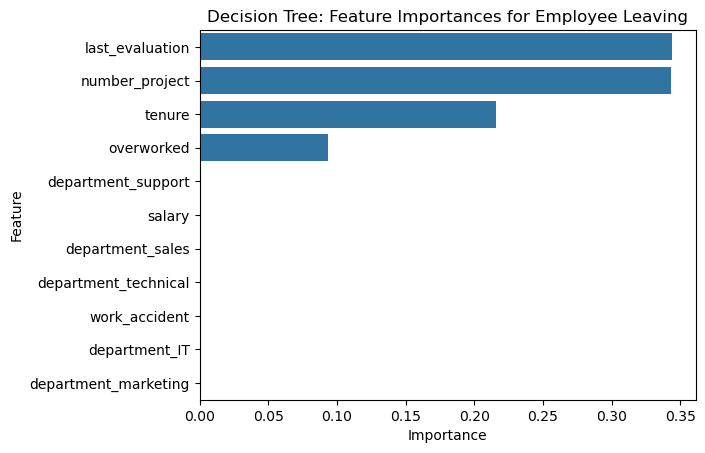

In [199]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The bar plot above shows that in this decision tree model, the most important features—ranked in order—are `last_evaluation`, `number_project`, `tenure`, and `overworked`. These variables contribute the most to predicting the target variable, `left`.

#### Random forest feature importance

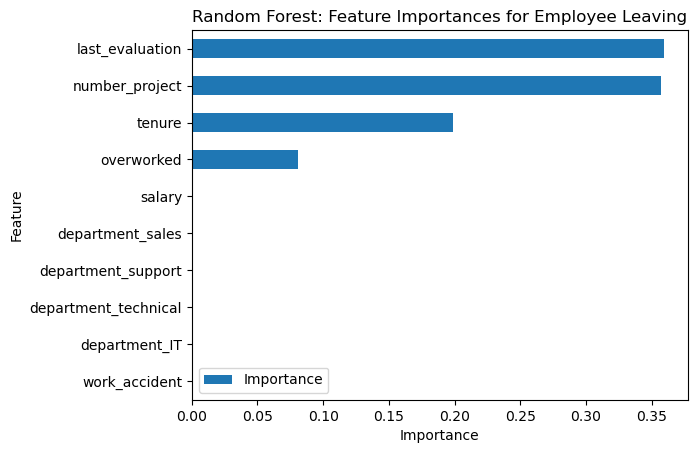

In [200]:
# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The plot above shows that in this random forest model, the top features in order of importance are `last_evaluation`, `number_project`, `tenure`, and `overworked`. These variables are the most useful for predicting the target variable, `left`, and they align with those identified by the decision tree model.

**Key Insights**
- Across all modeling approaches, workload and tenure consistently emerged as top predictors of employee turnover.
- Random forest models outperformed decision tree and logistic regression models in most evaluation metrics (accuracy, precision, F1, AUC), indicating that ensemble methods capture the complexity of the data better.
- Employees with high evaluation scores and a high number of projects are more likely to leave, suggesting that overwork may be contributing to attrition.
- Feature engineering (e.g., creating a binary “overworked” variable) still yielded strong performance, even with fewer features, which helps reduce the risk of data leakage.

**Business Recommendations**
- Cap the number of concurrent projects assigned to employees to prevent burnout.
- Investigate four-year tenure trends—employees at this tenure may need better career progression paths or support.
- Review and clarify overtime policies—transparency in expectations and compensation can improve morale.
- Reward efforts proportionally, rather than only rewarding those who work extreme hours.
- Foster open conversations about company culture and workload norms through team discussions or pulse surveys.

**Potential Recommendations for Management**
- Establish data collection protocols to ensure features like satisfaction and evaluation scores are consistently and fairly reported.
- Reassess performance review criteria to avoid reinforcing unhealthy work habits (e.g., tying promotions to extreme workloads).
- Use predictive modeling in HR dashboards to flag at-risk employees early and proactively offer support.

**Could the Model Be Improved?**
Yes.
- Further tuning hyperparameters could yield better precision, but with tradeoffs.
- Addressing potential data leakage (e.g., dropping last_evaluation) may improve reliability.
- Gathering more diverse features—like departmental data, recent promotion status, or work-from-home flexibility—could improve predictive power.

**Other Questions to Explore**
- Are certain departments or managers associated with higher turnover?
- How do promotion history and salary adjustments correlate with attrition?
- Can we predict future high performers, not just those at risk of leaving?
- What is the timeline from signs of disengagement to exit?

**Resources Used**
- Scikit-learn documentation – for model training and evaluation
- Pandas documentation – for data manipulation
- Google Advanced Data Analytics Certificate content – course materials
- Seaborn documentation – for data visualization
- Personal Notes
- Personal Documentations
  
**Ethical Considerations**
- Avoid using features that might introduce bias or unfairness (e.g., using performance reviews if they're subjective or inconsistently applied).
- Ensure transparency: Any predictive model used to assess employee retention should be explained clearly to affected stakeholders.
- Guard against using models in ways that could lead to discrimination or unjustified termination decisions.

## Step 5. Results and Evaluation




### Summary of model results
**Logistic Regression**
The logistic regression model achieved an accuracy of 83% on the test set, with a weighted precision of 80%, recall of 83%, and F1-score of 80%.

**Tree-Based Machine Learning – Round 1**
- Decision Tree (Cross-Validation): Precision of 91.5%, recall of 91.7%, F1-score of 91.6%, accuracy of 97.2%, and AUC of 96.98%.
- Random Forest (Test Set): Outperformed the decision tree with precision of 96.4%, recall of 91.9%, F1-score of 94.1%, accuracy of 98.1%, and AUC of 95.64%.

**Tree-Based Machine Learning – After Feature Engineering**
- Decision Tree (Cross-Validation): Precision of 85.7%, recall of 90.4%, F1-score of 87.9%, accuracy of 95.9%, and AUC of 95.87%.
- Random Forest (Cross-Validation): Achieved precision of 86.7%, recall of 87.9%, F1-score of 87.2%, accuracy of 95.7%, and AUC of 96.48%.
- Random Forest (Test Set): Delivered strong results with precision of 87.0%, recall of 90.4%, F1-score of 88.7%, accuracy of 96.2%, and AUC of 93.84%.

 
**Best Performing Model Summary**
- The Random Forest (Round 1 - Test Set) achieved the highest single-run scores, with a precision of 96.4%, recall of 91.9%, F1-score of 94.1%, accuracy of 98.1%, and AUC of 95.64%. It remains the top performer on the test set.
- However, Random Forest after feature engineering (Cross-Validation) demonstrated the highest AUC score overall at 96.48%, along with strong and consistent performance across folds (F1-score: 87.2%, accuracy: 95.7%). This suggests that the model is robust and generalizes well across data splits.
- In comparison, Random Forest (Round 2 - Test Set) also delivered good performance (F1-score: 88.7%, AUC: 93.84%) but did not surpass either the Round 1 Test or the Cross-Validated model.
- In terms of computation time, Decision Trees trained in under 5 seconds, while Random Forest models required 20–25 minutes each via GridSearchCV.

**Conclusion, Recommendations, and Next Steps**
- The models and their feature importance rankings suggest that overwork is a major factor contributing to employee turnover at the company.

**To help retain employees, I recommend the following actions:**
- Limit project load: Set a cap on the number of projects an employee can be assigned to prevent burnout.
- Address tenure dissatisfaction: Promote employees who have been with the company for at least four years, or investigate why this group shows signs of dissatisfaction.
- Manage work hours: Either compensate employees for long hours or reduce the expectation to work them.
- Clarify policies: Ensure employees are aware of overtime policies and clearly communicate expectations around workload and time off.
- Foster open dialogue: Facilitate company-wide and team-level discussions to explore and improve workplace culture.
- Revise evaluation criteria: Avoid reserving top evaluation scores only for those working over 200 hours per month. Implement a more balanced system that rewards effort and contribution proportionally.
  
**Next Steps**
- There may still be concerns about potential data leakage. It would be wise to test how model performance changes when the last_evaluation feature is removed. If evaluations are infrequent, building a model without this variable could better reflect real-world conditions. Alternatively, if evaluation scores are strongly linked to employee exits, it may be more effective to shift focus and build a_